In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM,Input
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import ModelCheckpoint
from scipy import stats

In [6]:
from keras import Model

In [7]:
X_train = np.load('data_files/unshuffled_withcateg/point6percenttrain/X_train_eachCateg.npy')

In [8]:
X_train.shape

(7531, 45, 25, 2)

In [9]:
X_test = np.load('data_files/unshuffled_withcateg/point6percenttrain/X_test_eachCateg.npy')
X_val = np.load('data_files/unshuffled_withcateg/point6percenttrain/X_val_eachCateg.npy')
y_test = np.load('data_files/unshuffled_withcateg/point6percenttrain/y_test_eachCateg.npy')
y_val = np.load('data_files/unshuffled_withcateg/point6percenttrain/y_val_eachCateg.npy')
y_train = np.load('data_files/unshuffled_withcateg/point6percenttrain/y_train_eachCateg.npy')

In [10]:
y_onehot_train = np.zeros((y_train.shape[0], 6))
k = 0
for val in y_train:
    y_onehot_train[k][val] = 1
    k+=1

In [11]:
y_onehot_train.shape

(7531, 6)

In [12]:
y_onehot_train = np.repeat(y_onehot_train[:, :, np.newaxis], 45, axis=2)
y_onehot_train = np.swapaxes(y_onehot_train, 1, 2)

In [14]:
y_onehot_train.shape

(7531, 45, 6)

In [15]:
y_onehot_test = np.zeros((y_test.shape[0], 6))
k = 0
for val in y_test:
    y_onehot_test[k][val] = 1
    k+=1

In [16]:
y_onehot_test = np.repeat(y_onehot_test[:, :, np.newaxis], 45, axis=2)
y_onehot_test = np.swapaxes(y_onehot_test, 1, 2)

In [17]:
y_onehot_val = np.zeros((y_val.shape[0], 6))
k = 0
for val in y_val:
    y_onehot_val[k][val] = 1
    k+=1

In [18]:
y_onehot_val = np.repeat(y_onehot_val[:, :, np.newaxis], 45, axis=2)
y_onehot_val = np.swapaxes(y_onehot_val, 1, 2)

In [19]:
y_onehot_val.shape

(2509, 45, 6)

In [20]:
def model_LSTM():
    input_frame = Input(batch_shape=(None, 45,25,2))
    flatinput = TimeDistributed(Flatten(input_shape=(45,25,2)))(input_frame)
    
    first_layer = LSTM(20,unit_forget_bias = 0.5, return_sequences = True)(flatinput)
    
    second_layer = TimeDistributed(Dense(6,activation='softmax'))(first_layer)
    model = Model(inputs = input_frame, outputs = second_layer)
    adam = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])
    
    return model

In [22]:
model = model_LSTM()

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 45, 25, 2)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 45, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 45, 20)            5680      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 45, 6)             126       
Total params: 5,806
Trainable params: 5,806
Non-trainable params: 0
_________________________________________________________________


In [24]:
import os
weights_path = os.getcwd()

In [25]:
filepath= weights_path+ "\Weights25_LSTMbasedModel\\" + "val1" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(X_train, y_onehot_train, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data = (X_val, y_onehot_val))

Instructions for updating:
Use tf.cast instead.
Train on 7531 samples, validate on 2509 samples
Epoch 1/100
7531/7531 [==============================] - 18s 2ms/step - loss: 1.8290 - acc: 0.2355 - val_loss: 1.7962 - val_acc: 0.2564
Epoch 2/100
7531/7531 [==============================] - 15s 2ms/step - loss: 1.7424 - acc: 0.3224 - val_loss: 1.7262 - val_acc: 0.2940
Epoch 3/100
7531/7531 [==============================] - 15s 2ms/step - loss: 1.6674 - acc: 0.3463 - val_loss: 1.6350 - val_acc: 0.3530
Epoch 4/100
7531/7531 [==============================] - 14s 2ms/step - loss: 1.5644 - acc: 0.4408 - val_loss: 1.5562 - val_acc: 0.4102
Epoch 5/100
7531/7531 [==============================] - 14s 2ms/step - loss: 1.4919 - acc: 0.4727 - val_loss: 1.5040 - val_acc: 0.4137
Epoch 6/100
7531/7531 [==============================] - 15s 2ms/step - loss: 1.4470 - acc: 0.5743 - val_loss: 1.4663 - val_acc: 0.5519
Epoch 7/100
7531/7531 [==============================] - 14s 2ms/step - loss: 1.4025 - a

Epoch 25/100
7531/7531 [==============================] - 13s 2ms/step - loss: 0.8753 - acc: 0.8481 - val_loss: 0.9035 - val_acc: 0.7987
Epoch 26/100
7531/7531 [==============================] - 13s 2ms/step - loss: 0.8572 - acc: 0.8546 - val_loss: 0.8891 - val_acc: 0.7919
Epoch 27/100
7531/7531 [==============================] - 14s 2ms/step - loss: 0.8233 - acc: 0.8736 - val_loss: 0.8703 - val_acc: 0.8131
Epoch 28/100
7531/7531 [==============================] - 14s 2ms/step - loss: 0.7964 - acc: 0.8789 - val_loss: 0.8552 - val_acc: 0.8009
Epoch 29/100
7531/7531 [==============================] - 14s 2ms/step - loss: 0.7751 - acc: 0.8817 - val_loss: 0.8318 - val_acc: 0.8081
Epoch 30/100
7531/7531 [==============================] - 14s 2ms/step - loss: 0.7597 - acc: 0.8790 - val_loss: 0.8216 - val_acc: 0.8033
Epoch 31/100
7531/7531 [==============================] - 14s 2ms/step - loss: 0.7453 - acc: 0.8794 - val_loss: 0.7810 - val_acc: 0.8416
Epoch 32/100
7531/7531 [=================

Epoch 55/100
7531/7531 [==============================] - 15s 2ms/step - loss: 0.3058 - acc: 0.9621 - val_loss: 0.6024 - val_acc: 0.8074
Epoch 56/100
7531/7531 [==============================] - 15s 2ms/step - loss: 0.2943 - acc: 0.9628 - val_loss: 0.6113 - val_acc: 0.8077
Epoch 57/100
7531/7531 [==============================] - 41s 5ms/step - loss: 0.2872 - acc: 0.9627 - val_loss: 0.5687 - val_acc: 0.8287
Epoch 58/100
7531/7531 [==============================] - 78s 10ms/step - loss: 0.2819 - acc: 0.9611 - val_loss: 0.5903 - val_acc: 0.8064
Epoch 59/100
7531/7531 [==============================] - 79s 10ms/step - loss: 0.2733 - acc: 0.9633 - val_loss: 0.5888 - val_acc: 0.8015
Epoch 60/100
7531/7531 [==============================] - 64s 9ms/step - loss: 0.2662 - acc: 0.9617 - val_loss: 0.5278 - val_acc: 0.8404
Epoch 61/100
7531/7531 [==============================] - 62s 8ms/step - loss: 0.2602 - acc: 0.9611 - val_loss: 0.5837 - val_acc: 0.8224
Epoch 62/100
7531/7531 [===============

Epoch 87/100
7531/7531 [==============================] - 57s 8ms/step - loss: 0.1297 - acc: 0.9745 - val_loss: 0.5532 - val_acc: 0.8233
Epoch 88/100
7531/7531 [==============================] - 58s 8ms/step - loss: 0.1281 - acc: 0.9748 - val_loss: 0.5603 - val_acc: 0.8187
Epoch 89/100
7531/7531 [==============================] - 67s 9ms/step - loss: 0.1284 - acc: 0.9733 - val_loss: 0.5123 - val_acc: 0.8429
Epoch 90/100
7531/7531 [==============================] - 61s 8ms/step - loss: 0.1316 - acc: 0.9659 - val_loss: 0.5621 - val_acc: 0.8178
Epoch 91/100
7531/7531 [==============================] - 58s 8ms/step - loss: 0.1190 - acc: 0.9748 - val_loss: 0.5018 - val_acc: 0.8461
Epoch 92/100
7531/7531 [==============================] - 58s 8ms/step - loss: 0.1144 - acc: 0.9819 - val_loss: 0.5702 - val_acc: 0.8186
Epoch 93/100
7531/7531 [==============================] - 61s 8ms/step - loss: 0.1122 - acc: 0.9821 - val_loss: 0.5586 - val_acc: 0.8279
Epoch 94/100
7531/7531 [=================

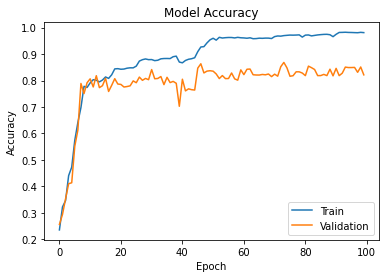

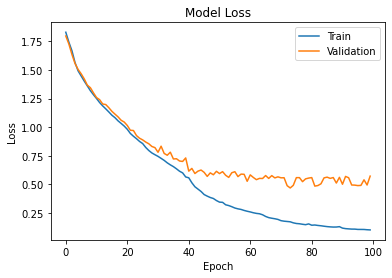

In [26]:
## plot accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
model = model_LSTM()
#load best weights from current training
model.load_weights("Weights25_LSTMbasedModel/val1-74-0.8685.hdf5")

In [28]:
y_onehot_pred = model.predict(X_test)

In [29]:
y_onehot_pred.shape

(2516, 45, 6)

In [30]:
y_pred = np.argmax(y_onehot_pred, axis = 2)
y_test = np.argmax(y_onehot_test, axis = 2)
print(y_pred.shape)
print(y_test.shape)

(2516, 45)
(2516, 45)


In [31]:
ans = 0
for i in range(y_test.shape[0]):    
        for j in range(y_test.shape[1]):
            if y_test[i][j] == y_pred[i][j]:
                ans = ans + 1    
print(ans/(y_test.shape[0] * y_test.shape[1]) * 100)

85.35417770711888
